In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

In [2]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [5]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x: mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 7747.077148, Accuracy: 0.848400
Step: 200, Loss: 5439.362305, Accuracy: 0.879900
Step: 300, Loss: 4556.467773, Accuracy: 0.890900
Step: 400, Loss: 4132.035156, Accuracy: 0.896100
Step: 500, Loss: 3836.139160, Accuracy: 0.902600
Step: 600, Loss: 3646.572021, Accuracy: 0.903900
Step: 700, Loss: 3490.270996, Accuracy: 0.909100
Step: 800, Loss: 3385.605469, Accuracy: 0.909400
Step: 900, Loss: 3293.132324, Accuracy: 0.912800
Step: 1000, Loss: 3220.884277, Accuracy: 0.913700
Step: 1100, Loss: 3174.230469, Accuracy: 0.913700
Step: 1200, Loss: 3081.115723, Accuracy: 0.916400
Step: 1300, Loss: 3046.678955, Accuracy: 0.915400
Step: 1400, Loss: 3002.018555, Accuracy: 0.916300
Step: 1500, Loss: 2973.873535, Accuracy: 0.918700
Step: 1600, Loss: 2960.562988, Accuracy: 0.918200
Step: 1700, Loss: 2923.288818, Accuracy: 0.917500
Step: 1800, Loss: 2902.116699, Accuracy: 0.919000
Step: 1900, Loss: 2870.736816, Accuracy: 0.920000
Step: 2000, Loss: 2857.827881, Accuracy: 0.921100


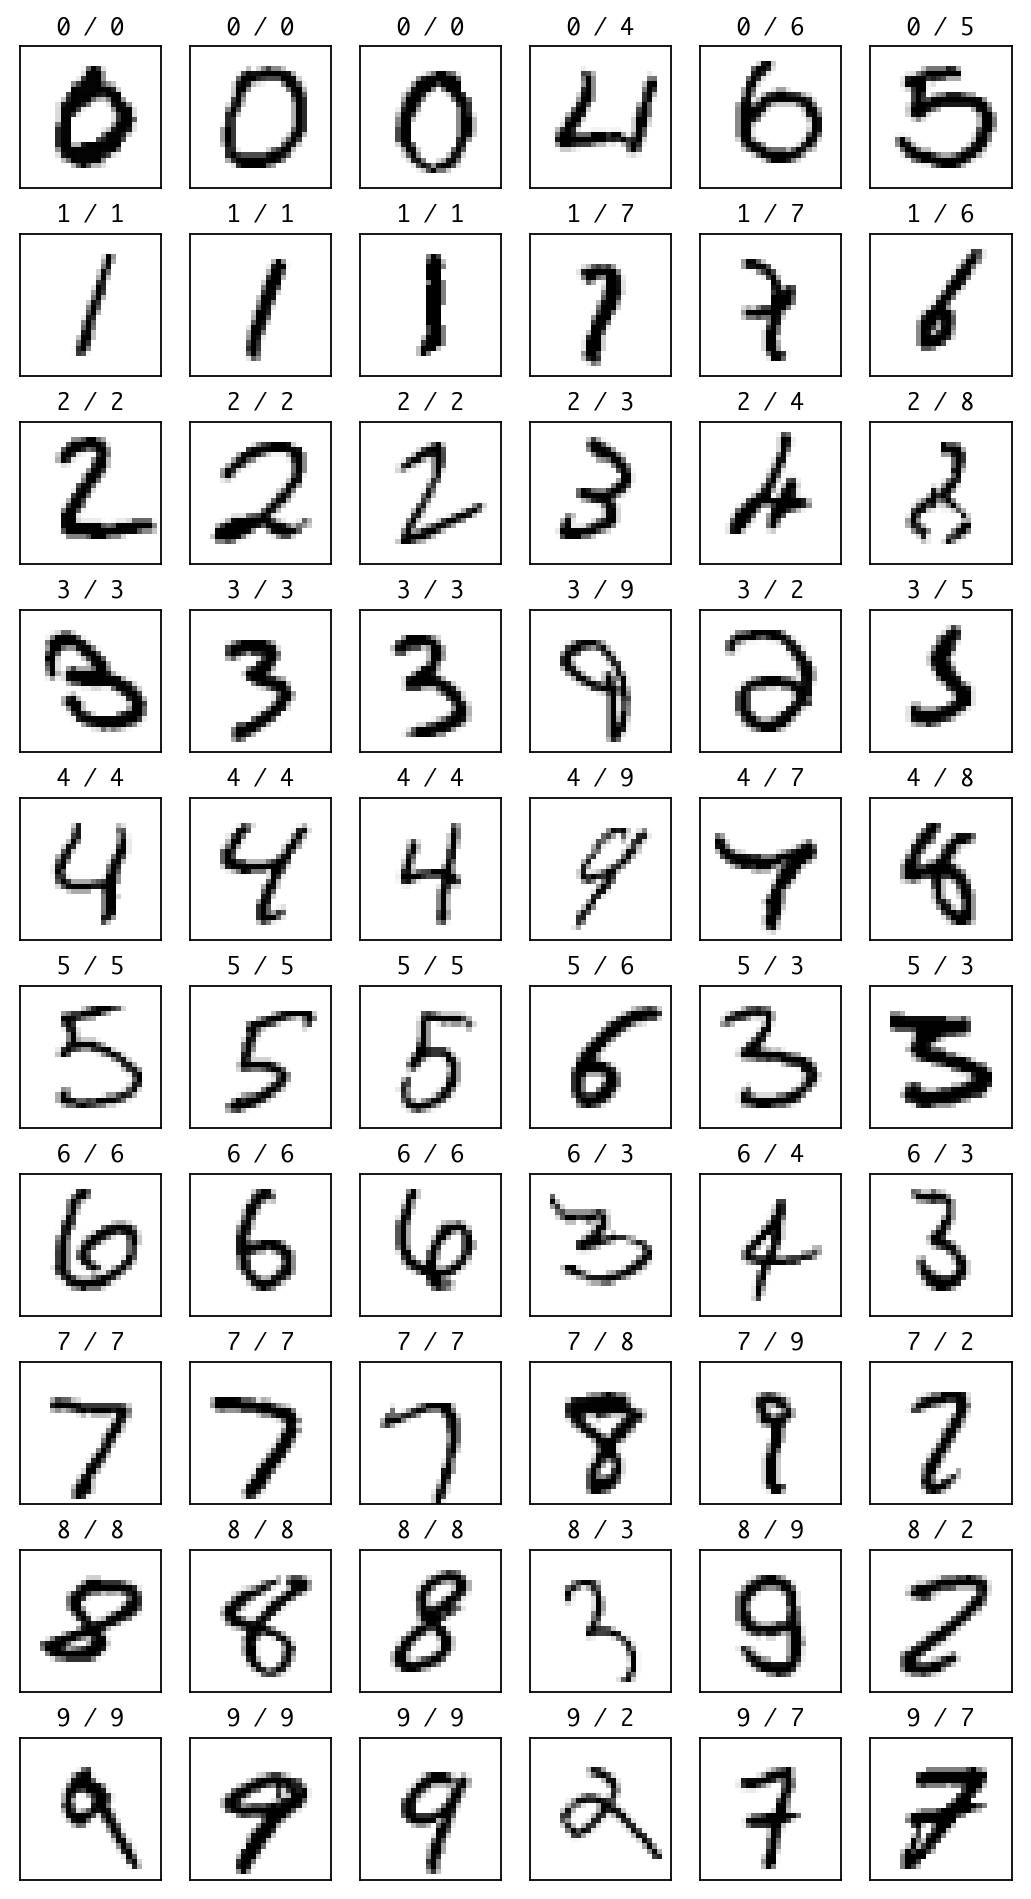

In [8]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x: images, t: labels})

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10, 6, i *6 + c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
            
            c += 1
            if c > 6:
                break